In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
## Creating synthetic data points
from sklearn.datasets import  make_classification

In [3]:
x,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [4]:
x

array([[-0.2955349 ,  0.60133907],
       [ 1.42004231,  1.94530468],
       [ 1.85991208,  2.25819448],
       ...,
       [ 0.75647097,  0.34128526],
       [-0.78771762,  1.17998027],
       [ 2.5637777 ,  0.99639373]])

In [5]:
y

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,

<Axes: xlabel='0', ylabel='1'>

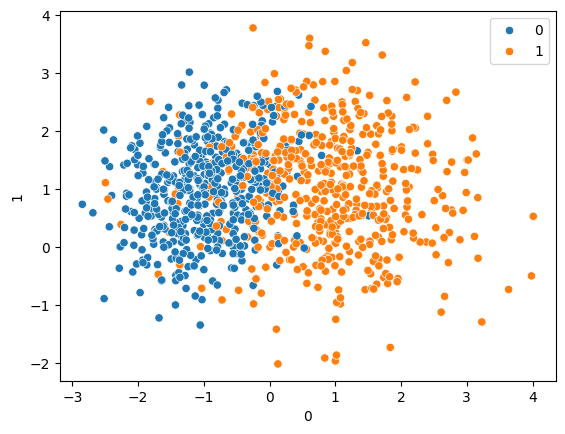

In [6]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [7]:
print("x_shape",x.shape)
print("y_shape",y.shape)


x_shape (1000, 2)
y_shape (1000,)


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [9]:
print("x1_shape",x_train.shape)
print("y1_shape",y_train.shape)
print("x2_shape",x_test.shape)
print("y2_shape",y_test.shape)

x1_shape (750, 2)
y1_shape (750,)
x2_shape (250, 2)
y2_shape (250,)


In [10]:
from sklearn.svm import SVC

In [11]:
svc = SVC(kernel='linear')

In [12]:
svc

SVC(kernel='linear')

In [13]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [14]:
## prediction 
y_pred = svc.predict(x_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
report = classification_report(y_test,y_pred)
matrix = confusion_matrix(y_test,y_pred)

In [50]:
svc.coef_

array([[ 1.73039074, -0.10806775]])

In [51]:
svc.intercept_

array([0.29454651])

In [17]:
print("classification report is :")
print(report)


classification report is :
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       116
           1       0.92      0.84      0.88       134

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



In [46]:
print("confusion matrix is :")
print(matrix)

confusion matrix is :
[[113  15]
 [ 11 111]]


In [19]:
## I changed n_clusters_per_class value from 1 to 2
x1,y1 = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

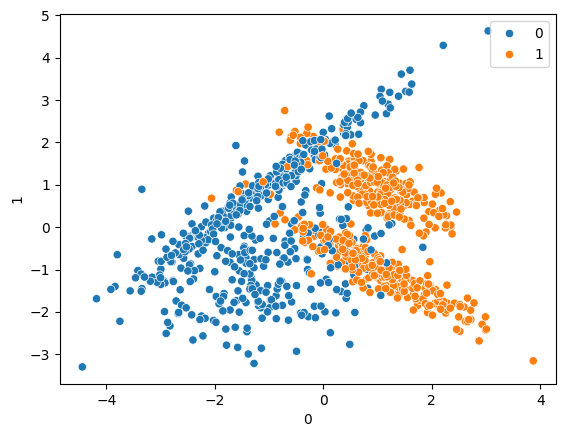

In [20]:
sns.scatterplot(x=pd.DataFrame(x1)[0],y=pd.DataFrame(x1)[1],hue=y1)

In [21]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25,random_state=10)

In [22]:
## Here we can see we cannot  seperate clusters in two cleanly that's why we are trying to for some oter kernels
rbf = SVC(kernel='rbf')
rbf

SVC()

In [23]:
rbf.fit(x1_train,y1_train)

SVC()

In [24]:
## prediction using rbf
y_pred1 = rbf.predict(x1_test)

In [25]:
report_rbf = classification_report(y1_test,y_pred1)
matrix_rbf = confusion_matrix(y1_test,y_pred1)

In [26]:
print("classification report is :")
print(report_rbf)

classification report is :
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       128
           1       0.90      0.89      0.90       122

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



In [27]:
print("confusion matrix is :")
print(matrix_rbf)

confusion matrix is :
[[116  12]
 [ 13 109]]


In [47]:
def svc_model_training(kernel_name,x1_train,x1_test,y1_train,y1_test):
    kernel_name = SVC(kernel=kernel_name)
    kernel_name.fit(x1_train,y1_train)
    ## prediction 
    y_pred1 = kernel_name.predict(x1_test)
    report = classification_report(y1_test,y_pred1)
    matrix = confusion_matrix(y1_test,y_pred1)
    print(f"classification report for {kernel_name} is :")
    print(report_rbf)
    print(f"confusion matrix for {kernel_name} is :")
    print(matrix_rbf)
    print("\n"*3)
    

In [48]:
kernel_list_svc = ['poly', 'sigmoid', 'linear']
for ele in kernel_list_svc:
    svc_model_training(ele,x1_train,x1_test,y1_train,y1_test)

classification report for SVC(kernel='poly') is :
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       128
           1       0.90      0.89      0.90       122

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

confusion matrix for SVC(kernel='poly') is :
[[116  12]
 [ 13 109]]




classification report for SVC(kernel='sigmoid') is :
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       128
           1       0.90      0.89      0.90       122

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

confusion matrix for SVC(kernel='sigmoid') is :
[[116  12]
 [ 13 109]]




classification report for SVC(kernel='linear') is :
              precision    recall  f1-score 

## HyperParameter Tuning With SVC

In [32]:
from sklearn.model_selection import GridSearchCV

## defining parameter range
parameters = {"C" : [0.1 ,1 ,10 ,100 ,1000 ],
             "gamma": [1 ,0.1 ,0.01 ,0.001 ,0.0001],
             "kernel": ['rbf']}

In [37]:
model = SVC()
grid = GridSearchCV(estimator=model,param_grid=parameters,cv=5,verbose=5)
grid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=5)

In [38]:
grid.fit(x1_train,y1_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=5)

In [40]:
best = grid.best_params_
best

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [42]:
y_pred_best = grid.predict(x1_test)
report = classification_report(y1_test,y_pred_best)
matrix = confusion_matrix(y1_test,y_pred_best)
print(f"classification report for {best['kernel']}  kernel is :")
print(report_rbf)
print(f"confusion matrix for {best['kernel']} kernel is :")
print(matrix_rbf)
print("\n"*3)


classification report for rbf  kernel is :
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       128
           1       0.90      0.89      0.90       122

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

confusion matrix for rbf kernel is :
[[116  12]
 [ 13 109]]




